In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from plot_error_surfaces import plot_error_surfaces, PlotStuff

torch.manual_seed(0)  # Set random seed for reproducibility

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)  # Create input values from -1 to 0.9, step 0.1, shape (20, 1)
        self.y = torch.zeros(self.x.shape[0], 1)       # Initialize all targets to 0, shape (20, 1)
        self.y[self.x[:, 0] > 0.2] = 1                 # Set targets to 1 where x > 0.2
        self.len = self.x.shape[0]                     # Store number of samples

    def __len__(self):
        return self.len                                # Return number of samples

    def __getitem__(self, index):
        return self.x[index], self.y[index]            # Return input and target at given index
    
    
data_set = Data()  # Create dataset instance

# Creating the Model and Total Loss Function

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 640x480 with 0 Axes>

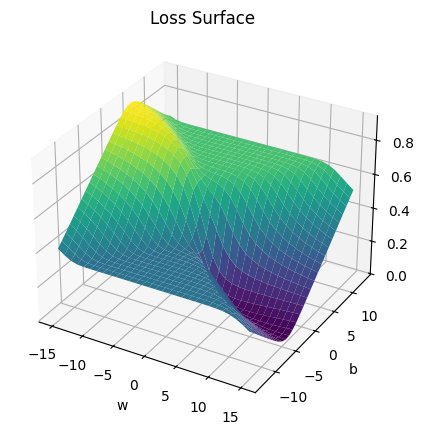

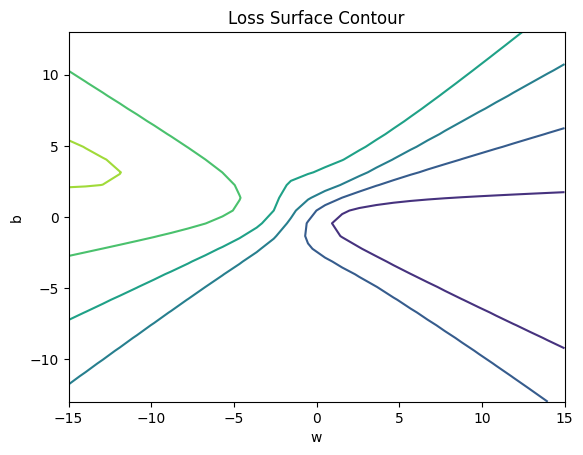

In [2]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    # Constructor: define model structure
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()      # Call parent nn.Module constructor
        self.linear = nn.Linear(n_inputs, 1)             # Linear layer (input_dim -> 1 output)
        
    # Forward pass: compute output probability
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))             # Apply sigmoid to linear output
        return yhat

# Instantiate the logistic_regression model with 1 input feature
model = logistic_regression(1)

# Set the weight and bias to specific (bad) initial values for demonstration
model.state_dict()['linear.weight'].data[0] = torch.tensor([-5.])   # Set weight to -5 (steep negative slope)
model.state_dict()['linear.bias'].data[0] = torch.tensor([-10.])    # Set bias to -10 (large negative offset)
print("The parameters: ", model.state_dict())                       # Print model parameters

# Create the plot_error_surfaces object to visualize the loss surface
get_surface = plot_error_surfaces(
    15,                # Range for weight axis in the plot
    13,                # Range for bias axis in the plot
    data_set[:][0],    # All input features from the dataset
    data_set[:][1],    # All target labels from the dataset
    30                 # Number of samples for meshgrid (resolution of the plot)
)

# # Custom binary cross-entropy loss function
def criterion(yhat, y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))  # BCE loss
    return out

# # Built-in criterion (alternative)
# criterion = nn.BCELoss()


# Create DataLoader for batching the data during training
trainloader = DataLoader(dataset=data_set, batch_size=3)  # DataLoader with batch size 3

# Set the learning rate for the optimizer
learning_rate = 2

# Create the optimizer (Stochastic Gradient Descent) to update model parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the Model via Batch Gradient Descent

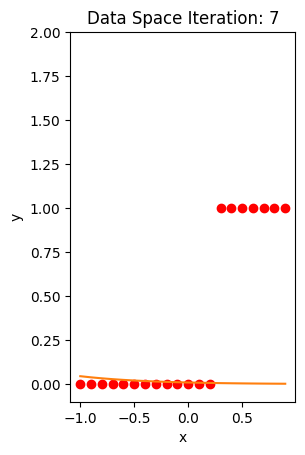

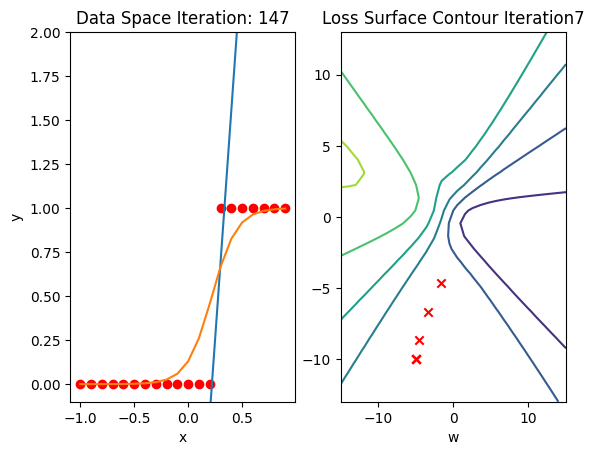

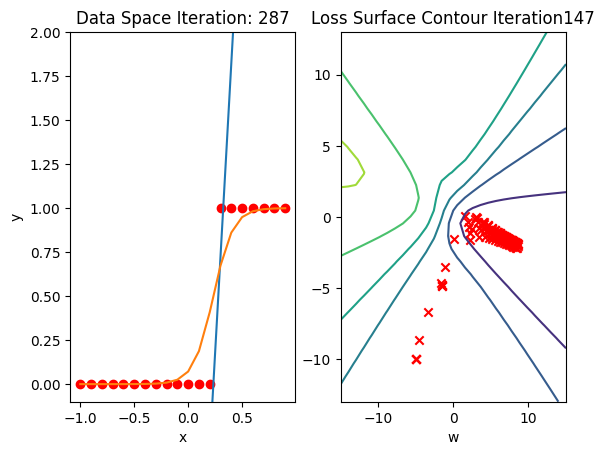

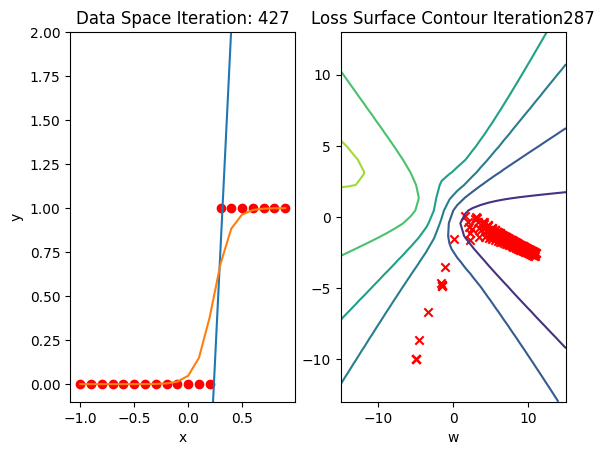

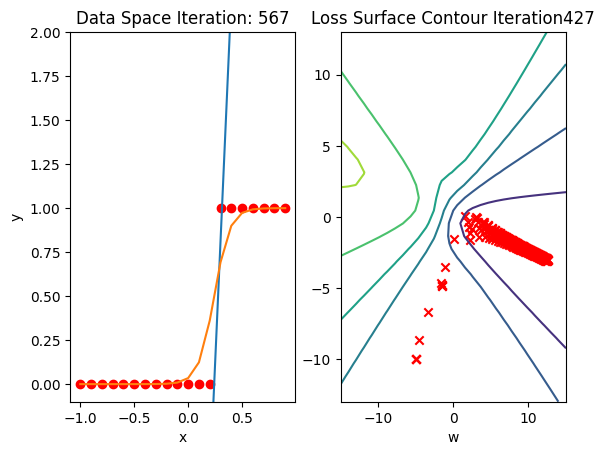

The accuracy:  tensor(1.)


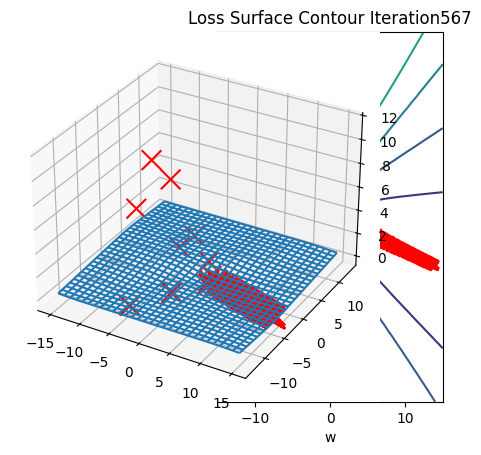

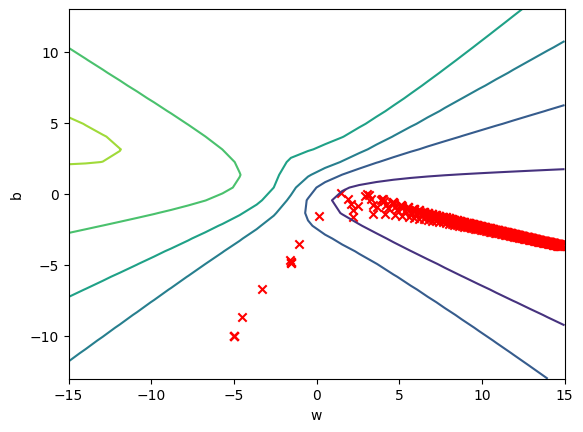

In [3]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)  # Forward pass: compute predicted probabilities for batch x
            loss = criterion(yhat, y)  # Compute the loss (custom or built-in BCE)
            optimizer.zero_grad()  # Reset gradients to zero before backward pass
            loss.backward()  # Backpropagation: compute gradients of loss w.r.t. model parameters
            optimizer.step()  # Update model parameters (weights and bias)
            get_surface.set_para_loss(model, loss.tolist())  # Record parameters and loss for visualization
        if epoch % 20 == 0:
            get_surface.plot_ps()  # Visualize progress every 20 epochs

train_model(100)  # Train for 100 epochs

# Make the Prediction

yhat = model(data_set.x)  # Get predicted probabilities for all data points
label = yhat > 0.5  # Apply threshold: if probability > 0.5, predict class 1, else class 0
# Calculate accuracy: compare predicted labels to true labels
# - Convert true labels to ByteTensor for comparison
# - (label == data_set.y) gives a tensor of True/False (1/0)
# - Convert to float and take mean to get accuracy as a fraction
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))
get_surface.final_plot()  # Final plot of parameter trajectory on loss surface
# Show the final plot of the loss surface with parameter trajectory